### Helper notebook for simulaing Multi armed Bandits using Thomspon Sampling

Experiment with different learning rates and different true probabilities to see how fast Thompson sampling 
zeroes in on the true winner. 

***Code mostly copied from Cam Davidson Pilon's book "Bayesian Method for Hackers" (Chapter 6)***

In [1]:
from ThompsonSampling import BanditSimulation, BayesianStrategy
%matplotlib inline
import numpy as np
from scipy.stats import beta as beta_scipy
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [2]:
# Experiment with different learning rates and different true (hidden) probabilities

learning_rate = 0.95
prob_array = np.array([0.9, 0.2, 0.85])

In [3]:
x = np.linspace(0.001, .999, 2000)
def plot_priors(bayesian_strategy, prob_array, lw=3, alpha=0.2, plt_vlines=True):
    
    # Plot posteriors
    wins = bayesian_strategy.wins
    trials = bayesian_strategy.trials
    for i in range(prob_array.shape[0]):
        y = beta_scipy(1 + wins[i], 1 + trials[i] - wins[i])
        p = plt.plot(x, y.pdf(x), lw=lw)
        colors = p[0].get_markeredgecolor()
        plt.fill_between(x=x, 
                         y1=y.pdf(x), 
                         y2=0, 
                         color=colors, 
                         alpha=alpha,
                         label="underlying probability: %.2f" % prob_array[i])
        if plt_vlines:
            plt.vlines(x=prob_array[i], 
                       ymin=0, 
                       ymax=y.pdf(prob_array[i]),
                       colors=colors, 
                       linestyles="--", 
                       lw=2)
            
        plt.autoscale(tight="True")
        plt.title("Posteriors After %d pull" % bayesian_strategy.total_pulls +
                  "s")
        plt.autoscale(tight=True)
    return

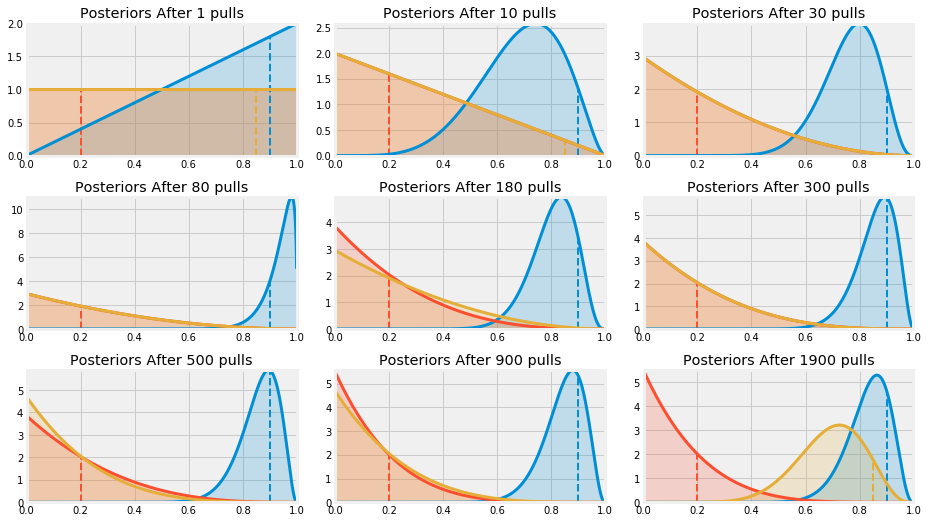

In [4]:
b = BanditSimulation(prob_array)
ts = BayesianStrategy(b, learning_rate=learning_rate)

fig = plt.figure(figsize=(13, 12))
draw_samples = [1, 9, 20, 50, 100, 120, 200, 400, 1000]

for k, j in enumerate(draw_samples):

    plt.subplot(5, 3, k + 1)
    ts.sample_bandits(n=j)
    plot_priors(bayesian_strategy=ts, prob_array=prob_array)
    plt.subplots_adjust(hspace = .001)
    plt.autoscale(tight=True)
plt.tight_layout()
